# Data Set questions

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [30]:
df=pd.read_csv("matches.csv")

In [31]:
df[pd.isnull(df['city'])]
df['city'].fillna('Amsterdam',inplace=True)

In [32]:
df[pd.isnull(df['winner'])]
df['toss_winner'].fillna('Tie',inplace=True)

In [24]:
win=df.query("win_by_wickets>0")

# Which team has won maximum number of matches while chasing?

In [25]:
print("{} has won maximum matches while chasing".format(win['winner'].value_counts().idxmax()))

Kolkata Knight Riders has won maximum matches while chasing


In [26]:
lost=df.query("win_by_wickets==0 and (toss_decision=='field' or (toss_decision=='bat' and toss_winner!=winner))")

# Which team has lost maximum number of matches while chasing?

In [27]:
print("{} has lost maximum matches while chasing".format(lost['winner'].value_counts().idxmax()))

Mumbai Indians has lost maximum matches while chasing


In [33]:
df['winner'].fillna('none',inplace=True)
df['player_of_match'].fillna('none',inplace=True)
df['umpire1'].fillna('none',inplace=True)
df['umpire2'].fillna('none',inplace=True)
df['umpire3'].fillna('none',inplace=True)

# Which player has won maximum number of MoM awards while chasing?

In [100]:
#2question
ss=df[df["toss_winner"]==df['winner']]
dt=ss[['venue','toss_decision']]
#for s in ss:
li=list(dt['venue'].unique())
sr=dt.groupby('venue')
best_li=[]
for l in li:
    grp=sr.get_group(l)
    field=np.count_nonzero(grp.toss_decision=='field')
    bat=np.count_nonzero(grp.toss_decision=='bat')
    if field>bat:
        best_li.append("field")
    else:
        best_li.append("bat")
final=list(zip(li,best_li)) 
dataframe=pd.DataFrame(final,columns=['venue',"best_decision"])
dataframe

,venue,best_decision
0,Maharashtra Cricket Association Stadium,field
1,Saurashtra Cricket Association Stadium,field
2,Holkar Cricket Stadium,field
3,M Chinnaswamy Stadium,field
4,"Rajiv Gandhi International Stadium, Uppal",field
5,Wankhede Stadium,field
6,Eden Gardens,field
7,Feroz Shah Kotla,field
8,"Punjab Cricket Association IS Bindra Stadium, ...",field
9,Green Park,field


# Which player has won maximum number of MoM awards while chasing?

In [108]:
pom=df.query("win_by_wickets>0")
print("{} has won maximum number of MoM awards while chasing".format(pom['player_of_match'].value_counts().idxmax()))

YK Pathan has won maximum number of MoM awards while chasing


# Which batsman has played maximum number of dot balls?

In [4]:
delivery=pd.read_csv("deliveries.csv")

In [113]:
bat=delivery.query("total_runs==0")

In [118]:
print("{} batsman has played maximum number of dot balls".format(bat['batsman'].value_counts().idxmax()))

V Kohli batsman has played maximum number of dot balls


# Which batsmen came to crease but never got a chance to face a ball?

In [165]:
q=delivery[['match_id','batsman','non_striker','player_dismissed','dismissal_kind']]
q=q.query("dismissal_kind=='run out'")
q=q.query("player_dismissed!=batsman")
q

,match_id,batsman,non_striker,player_dismissed,dismissal_kind
247,1,A Choudhary,YS Chahal,YS Chahal,run out
371,2,HH Pandya,TG Southee,TG Southee,run out
2700,12,P Negi,KM Jadhav,KM Jadhav,run out
4989,21,SV Samson,KK Nair,KK Nair,run out
5399,23,YK Pathan,SA Yadav,SA Yadav,run out
5546,24,N Rana,JC Buttler,JC Buttler,run out
5632,24,HH Pandya,Harbhajan Singh,Harbhajan Singh,run out
5966,25,MS Dhoni,RA Tripathi,RA Tripathi,run out
6680,28,Harbhajan Singh,MJ McClenaghan,MJ McClenaghan,run out
6823,29,G Gambhir,SP Narine,SP Narine,run out


In [171]:
if q.iloc[300]['batsman']!=q.iloc[200]['non_striker']:
    print("yes")

yes


In [187]:
m=len(q)
i=0
lis=[]
while i<m:
    j=0
    while j<m:
        if q.iloc[j]['batsman']==q.iloc[i]['non_striker']:
            break
        j+=1
    if j==m:
        lis.append(q.iloc[i]['non_striker'])
    i+=1

['YS Chahal',
 'TG Southee',
 'RA Tripathi',
 'MJ McClenaghan',
 'SP Narine',
 'AJ Tye',
 'KH Pandya',
 'S Aravind',
 'RA Tripathi',
 'CR Woakes',
 'TM Head',
 'ML Hayden',
 'L Ronchi',
 'D Salunkhe',
 'VRV Singh',
 'L Ronchi',
 'P Kumar',
 'RT Ponting',
 'RR Sarwan',
 'SB Bangar',
 'WPUJC Vaas',
 'W Jaffer',
 'DT Patil',
 'A Kumble',
 'M Kaif',
 'A Chopra',
 'AB Agarkar',
 'A Nel',
 'Kamran Akmal',
 'M Kaif',
 'ML Hayden',
 'Y Venugopal Rao',
 'L Balaji',
 'WA Mota',
 'LA Carseldine',
 'S Sohal',
 'S Tyagi',
 'TL Suman',
 'T Henderson',
 'SS Shaikh',
 'R Sathish',
 'VVS Laxman',
 'MM Patel',
 'TL Suman',
 'ML Hayden',
 'MJ Lumb',
 'PD Collingwood',
 'VVS Laxman',
 'Harmeet Singh',
 'MD Mishra',
 'MJ Lumb',
 'R Ashwin',
 'S Sreesanth',
 'FY Fazal',
 'EJG Morgan',
 'S Sohal',
 'VVS Laxman',
 'R Sharma',
 'JE Taylor',
 'AB Agarkar',
 'AA Chavan',
 'BA Bhatt',
 'R Bhatia',
 'DB Das',
 'R Sharma',
 'DL Vettori',
 'AB Dinda',
 'Bipul Sharma',
 'DJ Harris',
 'VR Aaron',
 'P Kumar',
 'DB Das'

In [189]:
set(lis)

{'A Chopra',
 'A Kumble',
 'A Nel',
 'AA Chavan',
 'AB Agarkar',
 'AB Dinda',
 'AJ Tye',
 'AS Rajpoot',
 'BA Bhatt',
 'Bipul Sharma',
 'C Munro',
 'CA Lynn',
 'CA Pujara',
 'CJ Jordan',
 'CM Gautam',
 'CR Woakes',
 'D Salunkhe',
 'DB Das',
 'DH Yagnik',
 'DJ Bravo',
 'DJ Harris',
 'DL Vettori',
 'DT Patil',
 'EJG Morgan',
 'FY Fazal',
 'GB Hogg',
 'HV Patel',
 'Harmeet Singh',
 'Iqbal Abdulla',
 'Ishan Kishan',
 'J Yadav',
 'JE Taylor',
 'K Paul',
 'KH Pandya',
 'Kamran Akmal',
 'Kuldeep Yadav',
 'L Balaji',
 'L Ronchi',
 'LA Carseldine',
 'LJ Wright',
 'M Ali',
 'M Kaif',
 'MA Starc',
 'MD Mishra',
 'MJ Lumb',
 'MJ McClenaghan',
 'ML Hayden',
 'MM Patel',
 'MM Sharma',
 'MS Gony',
 'Mohammad Nabi',
 'NM Coulter-Nile',
 'P Kumar',
 'P Sahu',
 'PD Collingwood',
 'PV Tambe',
 'R Ashwin',
 'R Bhatia',
 'R Parag',
 'R Sathish',
 'R Sharma',
 'RA Tripathi',
 'RR Sarwan',
 'RT Ponting',
 'S Aravind',
 'S Gill',
 'S Kaul',
 'S Sohal',
 'S Sreesanth',
 'S Tyagi',
 'SA Abbott',
 'SB Bangar',
 '

# Which bowler has hit for maximum number of 1s/2s/3s/4s/6s?

In [15]:
delivery.query("batsman_runs==1")['bowler'].value_counts().idxmax()

'Harbhajan Singh'

In [16]:
delivery.query("batsman_runs==2")['bowler'].value_counts().idxmax()

'A Mishra'

In [17]:
delivery.query("batsman_runs==3")['bowler'].value_counts().idxmax()

'P Kumar'

In [18]:
delivery.query("batsman_runs==4")['bowler'].value_counts().idxmax()

'UT Yadav'

In [19]:
delivery.query("batsman_runs==5")['bowler'].value_counts().idxmax()

'AB Dinda'

In [20]:
delivery.query("batsman_runs==6")['bowler'].value_counts().idxmax()

'PP Chawla'

# Which batsman got stumped out maximum number of times?

In [86]:
delivery.query("dismissal_kind=='stumped'")['batsman'].value_counts().idxmax()

'SK Raina'

# Which non-striker has been part of maximum number of runouts?

In [29]:
delivery.query("dismissal_kind=='run out'")['non_striker'].value_counts().idxmax()

'SK Raina'

# 5 new queries

## 1. Which ipl team is more successful?

Mumbai Indians is most successful 


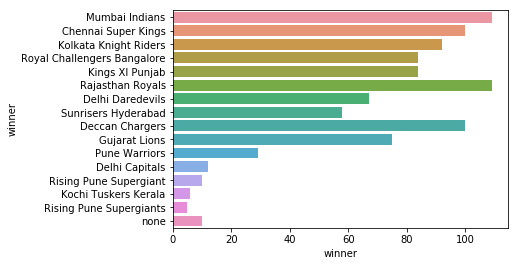

In [39]:
import seaborn as sns
print("{} is most successful ".format(df.winner.value_counts().idxmax()))
sns.countplot(y='winner', data = df)
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

## 2.Which season had most number of matches?

In [48]:
print("{} had most number of matches ".format(df.season.value_counts().idxmax()))

2013 had most number of matches 


## 3. Which Team had won by maximum runs?

In [53]:
df['winner'][df.win_by_runs.idxmax()]

'Mumbai Indians'

## 4. How many matches we’ve got in the dataset?

In [54]:
df.id.max()

11415

## 5. Has Toss-winning helped in Match-winning?

In [80]:
from collections import Counter
ss = df.query("toss_winner==winner")
total=np.size(ss)
yes=np.count_nonzero(ss)
no=total-yes

In [81]:
if yes>no:
    print("yes")
else:
    print("no")

yes
